In [1]:
# 1.1 Import tensorflow and other libraries.
import tensorflow as tf
import numpy as np

%matplotlib inline
import pylab

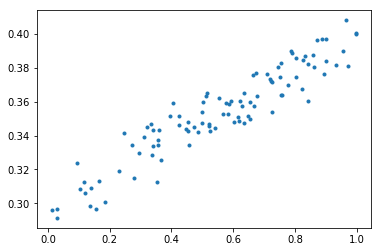

In [2]:
# 1.2 Create input data using NumPy. y = x * 0.1 + 0.3 + noise
x_train = np.random.rand(100).astype(np.float32)
noise = np.random.normal(scale=0.01, size=len(x_train))
y_train = x_train * 0.1 + 0.3 + noise

# Pplot our input data.
pylab.plot(x_train, y_train, '.')

In [3]:
# Create some fake evaluation data
x_eval = np.random.rand(len(x_train)).astype(np.float32)
noise = np.random.normal(scale=0.01, size=len(x_train))
y_eval = x_eval * 0.1 + 0.3 + noise

In [4]:
# 1.3 Buld inference graph.
# Create Variables W and b that compute y_data = W * x_data + b
W = tf.get_variable(shape=[], name='weights')
b = tf.get_variable(shape=[], name='bias')

print(W)
print(b)

# Create a placeholder we'll use later to feed x's into the graph for training and eval.
# shape=[None] means we can put in any number of examples. 
# This is used for minibatch training, and to evaluate a lot of examples at once.
x = tf.placeholder(shape=[None], dtype=tf.float32, name='x')

print(x)

# This is the same as tf.add(tf.mul(W, x), b), but looks nicer
y = W * x + b

<tf.Variable 'weights:0' shape=() dtype=float32_ref>
<tf.Variable 'bias:0' shape=() dtype=float32_ref>
Tensor("x:0", shape=(?,), dtype=float32)


In [5]:
# Write the graph so we can look at it in TensorBoard
# Now is a good time to try that
sw = tf.summary.FileWriter('/root/tensorboard/linear', graph=tf.get_default_graph())

In [6]:
# Create a placeholder we'll use later to feed the correct y value into the graph
y_label = tf.placeholder(shape=[None], dtype=tf.float32, name='y_label')
print(y_label)

Tensor("y_label:0", shape=(?,), dtype=float32)


In [7]:
# 1.4 Build training graph.
loss = tf.reduce_mean(tf.square(y - y_label))  # Create an operation that calculates loss.
optimizer = tf.train.GradientDescentOptimizer(0.5)  # Create an optimizer.
train = optimizer.minimize(loss)  # Create an operation that minimizes loss.

# 'loss', 'optimizer' and 'train' are.
print("loss:", loss)
print("optimizer:", optimizer)
print("train:", train)

loss: Tensor("Mean:0", shape=(), dtype=float32)
optimizer: <tensorflow.python.training.gradient_descent.GradientDescentOptimizer object at 0x7f94f0152710>
train: name: "GradientDescent"
op: "NoOp"
input: "^GradientDescent/update_weights/ApplyGradientDescent"
input: "^GradientDescent/update_bias/ApplyGradientDescent"



In [8]:
# Create an operation to initialize all the variables.
init = tf.global_variables_initializer()
print(init)

name: "init"
op: "NoOp"
input: "^weights/Assign"
input: "^bias/Assign"



In [9]:
# 1.6 Create a session and launch the graph.
sess = tf.InteractiveSession()
sess.run(init)

# Initial W and b values.
print(sess.run([W, b]))

[1.0445656, -0.15355742]


In [10]:
# test that we can compute a y from an x (without having trained anything). 
# x must be a vector, hence [3] not just 3.
x_in = [3]
sess.run(y, feed_dict={x: x_in})

array([ 2.98013926], dtype=float32)

In [11]:
# Calculate accuracy on the evaluation data before training
def eval():
    return sess.run(loss, feed_dict={x: x_eval, y_label: y_eval})
eval()

0.075485334

In [12]:
# Add a Summary Operation so we can visualize the loss in TensorBoard
scalar_summary = tf.summary.scalar('loss', loss)
summary_op = tf.summary.merge([scalar_summary])

In [13]:
# Write the graph so we can look at it in TensorBoard
# Now is a good time to try that
sw = tf.summary.FileWriter('/root/tensorboard/linear', graph=sess.graph)

In [14]:
# 1.7 Perform training.
for step in range(201):
  # Run the training op; feed the training data into the graph
  summary_str, _ = sess.run([summary_op, train], feed_dict={x: x_train, y_label: y_train})
  sw.add_summary(summary_str, step)
  # Watch training happen real time.
  if step % 20 == 0:
    print(step, sess.run([W, b]))

0 [0.94427317, -0.22481674]
20 [0.41579974, 0.11437155]
40 [0.21586943, 0.23073885]
60 [0.14214869, 0.27364719]
80 [0.11496547, 0.28946891]
100 [0.10494213, 0.29530287]
120 [0.10124623, 0.29745403]
140 [0.099883407, 0.29824725]
160 [0.099380903, 0.29853973]
180 [0.099195607, 0.29864758]
200 [0.09912727, 0.29868737]


In [15]:
# Write the graph so we can look at it in TensorBoard
# Now is a good time to try that
sw = tf.summary.FileWriter('/root/tensorboard/linear', graph=sess.graph)

(0, 1.0)

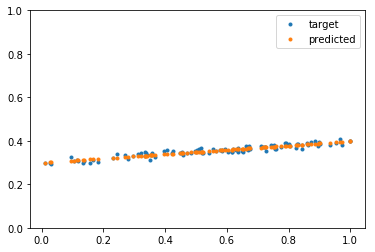

In [16]:
# 1.8 Plot the predicted values
pylab.plot(x_train, y_train, '.', label="target")
pylab.plot(x_train, sess.run(y, feed_dict={x: x_train, y_label: y_train}), ".", label="predicted")
pylab.legend()
pylab.ylim(0, 1.0)

In [17]:
# Check accuracy on eval data after training
eval()

0.00011576223

# Save and Restore a Model with SavedModelBundle

In [18]:
def predict(x_in): return sess.run(y, feed_dict={x: [x_in]})

In [19]:
# Save the model
saver = tf.train.Saver()
saver.save(sess, './my_checkpoint.ckpt')

'./my_checkpoint.ckpt'

In [20]:
# Current prediction
predict(3)

array([ 0.59606922], dtype=float32)

In [21]:
# Reset the model by running the init op again
sess.run(init) 

In [22]:
# Prediction after variables reinitialized
predict(3)

array([-2.42000198], dtype=float32)

In [23]:
saver.restore(sess, './my_checkpoint.ckpt')

INFO:tensorflow:Restoring parameters from ./my_checkpoint.ckpt


In [24]:
# Predictions after variables restored
predict(3)

array([ 0.59606922], dtype=float32)